<div class="panel panel-success">
  <div class="panel-heading">
    <h3 class="panel-title">BREAKOUT INSTRUCTIONS</h3>
  </div> 
  <div class="panel-body">

There are two parts to this long breakout:
- In part A you will debrief and debug the code from your Pre-class work with each other. 
- In part B, you will analyze the figures generated in the final part of your Pre-class work.  </div>
</div>

<blockquote class="alert-success">
     Part A
    </blockquote>

<span class='minerva-question' style='background-color:#5cb85c;padding: 5px 20px 5px 20px;line-height:30px;color:white;font-weight: bold; border-radius: 25px'>Question 1</span>

Everyone needs to paste their code for the height function (and average comparisons function if needed) below.

In [6]:

## MM:

def depth(root, node):
    """finds the depth of the node in a BST. depth of root is 0.

    Input:
    - root: a node, the root of the BST
    - node: a node to compute the depth of

    Output:
    - d: int, distance from node to root"""
    
    distance = 0
    current_node = root
    while(current_node != node):
          distance += 1
        if(node.data < current_node.data):
            current_node = current_node.l_child
        else: 
            current_node = current_node.r_child
    return distance



def avg_depth(bst):
    """Computes the average depth of a BST
    Input:
    - bst: a Node, root of the BST
    Output:
    - avg_d: float, average depth of the BST"""
    avg_comparisons = avg_cmp(bst)
    return avg_comparisons - 1



def avg_cmp(bst):
    comparisons = 0
    for node in bst.node_list:
        comparisons += depth(bst, node) + 1
    return comparisons/len(bst.node_list)

def max_depth(bst):
    max_depth = 0
    for node in bst.node_list:
        max_depth = max(max_depth, depth(bst, node))
    return max_depth

In [7]:
# Yueh Han 
def depth(root, node):  # recursive approach, in one line!
    return (1+depth(root,node.parent)) if node != root else 0

def max_depth(bst):#
    l_node = bst.l_child
    r_node = bst.r_child
    if l_node == None or r_node == None:
        return 0
    return max(1+max_depth(l_node), 1+max_depth(r_node))

In [4]:
#SADID
def depth(root, node):
    d = 0 #setting d to zero
    while node.data != root.data:
        d += 1 # implementing our conditions
        if node.data >= root.data:
            root = root.r_child #root child
        else:
            root = root.l_child
    return d

def max_depth(bst):
    if bst.r_child == None and bst.l_child == None:
        return 1
    elif bst == None:
        return 0
    else:
        max_left = max_depth(bst.l_child)
        #t
        max_right = max_depth(bst.r_child)
        return 1 + max(max_left,max_right)

<span class='minerva-question' style='background-color:#5cb85c;padding: 5px 20px 5px 20px;line-height:30px;color:white;font-weight: bold; border-radius: 25px'>Question 2</span>

Highlight any bugs that you are aware of in your own code. Now start to look at each other’s code.
- Are there any particularly elegant solutions? 
- Are there any subtle bugs?
- Decide on an interesting bug, or nearly-working code and fix it up collaboratively.

Write below (and be prepared to give a brief presentation to the other groups if asked) a summary of the discussion you had with your group about the points above.

> For `depth(root, node)`, it is more elegant to start from the nodes, and goes up all the way to the nodes. 
> The recursive functions becomes elegant solutions when we have tree-like data structure which the subtree of each tree is still a BST. 

<blockquote class="alert-success">
     Part B
    </blockquote>

<span class='minerva-question' style='background-color:#5cb85c;padding: 5px 20px 5px 20px;line-height:30px;color:white;font-weight: bold; border-radius: 25px'>Question 3</span>

Everyone needs to paste their figures for the average- and worst-case depth of elements in the tree.

In [11]:
## your code for producing the figures and the 

class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val # value of the node is the node, node 6's value is 6
        self.node_list = [self] 
        #self is the root of the bst

    def insert(self, node):
        """inserts a node into a *non-empty* tree rooted at the node, returns
        the root"""
        self.node_list.append(node)
        if self.data > node.data:
            if self.l_child is None:
                self.l_child = node
                node.parent = self
            else:
                self.l_child.insert(node)
        else:
            if self.r_child is None:
                self.r_child = node
                node.parent = self
            else:
                self.r_child.insert(node)
        return self

In [13]:
### plots

import numpy as np

N = range(1,1000)
max_depths = []
avg_depths = []

for i in N:
    bst_max_depth = 0
    bst_avg_depth = 0
  
    for iter in range(50):
        bst = None

        value_list = np.array(range(i))
        np.random.shuffle(value_list)

        node_list = [Node(value) for value in value_list]

        for node in node_list:
            if (bst == None):
                bst = node
            else:
                bst.insert(node)

        bst_max_depth += max_depth(bst)
        bst_avg_depth += avg_depth(bst)

    max_depths.append(bst_max_depth/50)
    avg_depths.append(bst_avg_depth/50)

# raise NotImplementedError()

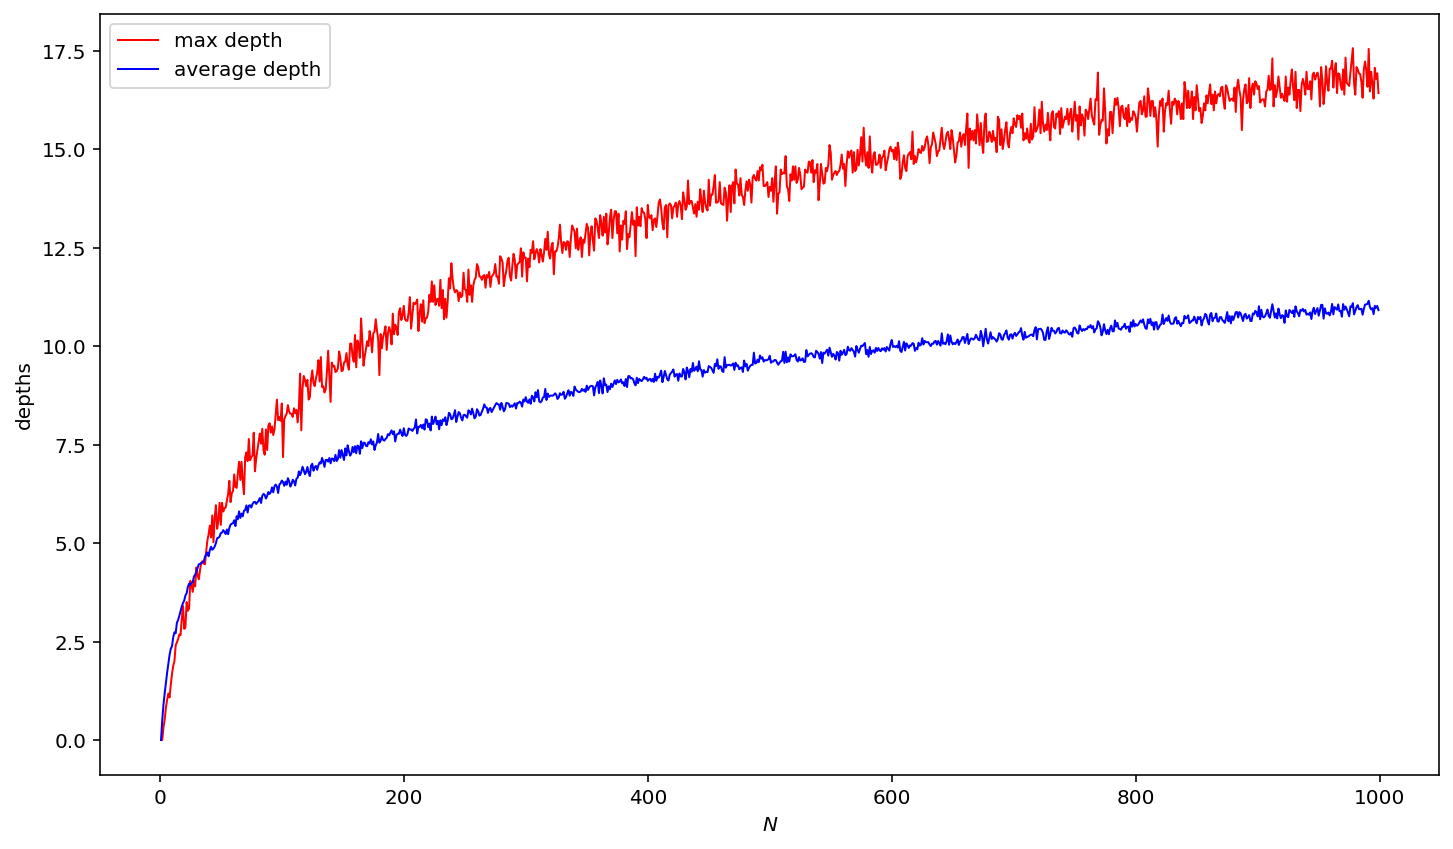

In [14]:
import matplotlib.pyplot as plt

plt.plot(N, max_depths, color = 'red',label = 'max depth', linewidth = 1.0)
plt.plot(N, avg_depths, color = 'blue',label = 'average depth', linewidth = 1.0)
plt.xlabel('$N$', fontsize=10)
plt.ylabel('depths', fontsize=10)
plt.legend()
plt.show()

<span class='minerva-question' style='background-color:#5cb85c;padding: 5px 20px 5px 20px;line-height:30px;color:white;font-weight: bold; border-radius: 25px'>Question 4</span>

Discuss the following:
- Are there any discrepancies between the figures? Investigate possible causes of the discrepancies if there are any.
- How does the average depth of a random BST with $N$ nodes scale?
- How does the worst depth of a random BST with $N$ nodes scale?

Write below (and be prepared to give a brief presentation to the other groups if asked) a summary of the discussion you had with your group about the points above.